In [1]:
import sys
sys.path.append('../src/')
from vi_hrg import *
from utils import c2d, hyperdist, p_hd, polar2cart, warn_tensor, unit_circle
from torch import autograd
torch.manual_seed(4)

In [2]:
def n_est(A):
    n_total = A.shape[0]
    F1 = (A.sum(dim=0)==1).sum().item()
    F2 = (A.sum(dim=0)==2).sum().item()
    return n_total + max(0, 2*F1-F2)

In [3]:
def alpha_est(A):
    n = A.shape[0]
    x = A.sum(dim=0)/A.sum(dim=0).min()
    #log_x = A.sum(dim=0).log().clamp(min=0.)
    return n*(x.log()).sum().reciprocal()/2        

NameError: name 'fa1000' is not defined

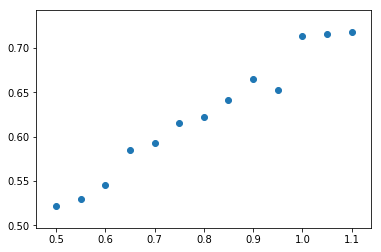

In [252]:
R = torch.tensor([6.0]).double()
T = torch.tensor([.1]).double()

Ns = [2000]
alphas = torch.arange(.5, 1.1, .05).double()
trials = 10

for N in Ns:
    a_est = []
    for a in alphas:
        acc = 0
        for t in range(trials):
            G = HRG(R=R, alpha=a, T=T)
            _,_,A = G.generate(N)
            acc += alpha_est(A).item()
        a_est.append(acc/trials)
    plt.scatter(alphas.numpy(), a_est)
    plt.scatter(alphas.numpy(), fa1000(np.array(a_est)))
plt.plot(alphas.numpy(),alphas.numpy())
plt.show()

In [12]:
fa5000 = lambda a: a*2 - 0.6

In [36]:
fa1000 = lambda a: a*3 - 0.9

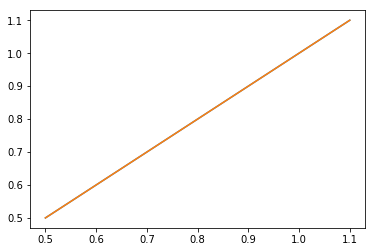

In [31]:
plt.plot(alphas.numpy(),alphas.numpy())
plt.plot(alphas.numpy(),fa1000(alphas.numpy()/3+0.35))

plt.show()

In [4]:
R_est = lambda A,a,T: 2*(8*n_est(A)**2*a**2*T/(A.sum()*torch.tensor(np.pi*T).sin()*(2*a-1)**2)).log()

In [91]:
avg_degree_T = lambda N, a, T, R: 8*T*N*a*a/(np.sin(np.pi*T)*(2*a-1)**2*(R/2).exp())

In [97]:
avg_degree = lambda N, a, R: 2*N*a*a/(np.pi*(a-0.5)*(a-0.5)*(R).exp().sqrt())

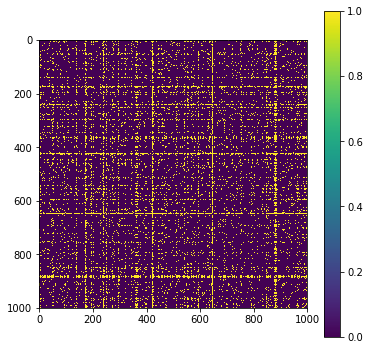

In [253]:
N = 1000
R = torch.tensor([8.]).double()
alpha = torch.tensor([.52]).double()
T = torch.tensor([.1]).double()

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
#G.plot()

In [254]:
A.sum()/N

tensor(132.4920, dtype=torch.float64)

In [255]:
avg_degree(N, alpha, R)

tensor([7882.2406], dtype=torch.float64)

In [256]:
avg_degree_T(N, alpha, T, R)

tensor([8013.4069], dtype=torch.float64)

In [257]:
R_est(A,alpha,T)

 /home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor). 


tensor([16.2047], dtype=torch.float64)

In [258]:
n_est(A)

1000

In [259]:
r_i_est = lambda A, a, T, R: torch.clamp(2*torch.log(2*n_est(A)*a*T/(A.sum(axis=0)*torch.sin(np.pi*T)*(a-0.5))),
                                        max=R.item())

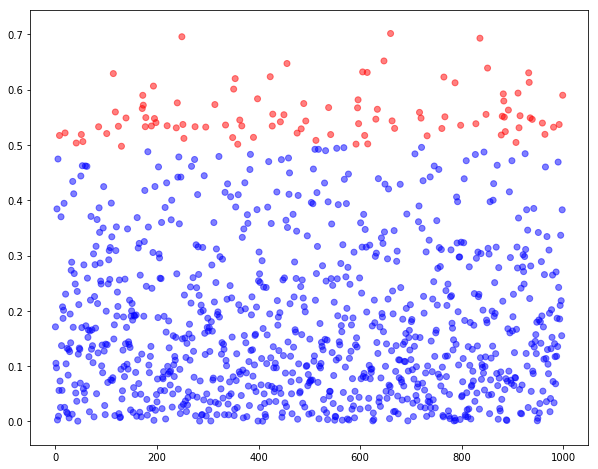

In [261]:
colors = []
for ri in r:
    if ri > R*0.5:
        colors.append('blue') #periphery
    else:
        colors.append('red') #core
plt.figure(figsize=(10,8))
plt.scatter(torch.arange(0,N,1), (r_i_est(A,alpha,T,R)-r)/R, color=colors, alpha=0.5)
plt.show()

 /home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor). 


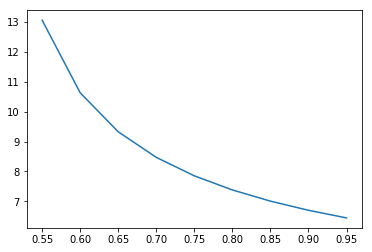

In [217]:
x = torch.arange(0.55,1.,0.05)
result = []
for a in x:
    result.append(R_est(A,a,T).item())
plt.plot(x,result)
plt.show()

In [198]:
np.ones(10)*'red'

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


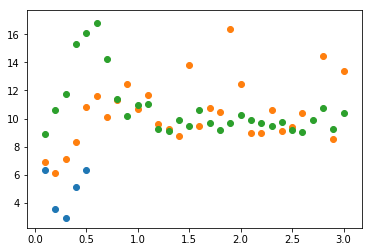

In [67]:
R = torch.tensor([6.0]).double()
T = torch.tensor([.1]).double()

Ns = [50, 200, 1000]
alphas = torch.arange(.1, 3.1, .1).double()
trials = 10

for N in Ns:
    Rest = []
    for a in alphas:
        acc = 0
        for t in range(trials):
            G = HRG(R=R, alpha=a, T=T)
            _,_,A = G.generate(N)
            a_est = alpha_est(A)
            acc += R_est(A,a_est,T).item()
        Rest.append(acc/trials)
    plt.scatter(alphas.numpy(), Rest)
plt.show()

In [7]:
A.sum(dim=0).log().clamp(min=0.).min()

tensor(5.1180, dtype=torch.float64)

In [8]:
alpha_est(A)

tensor(0.9722, dtype=torch.float64)

In [9]:
f = lambda x: torch.max(x-0.5, x*0.6-0.1)
r_est = lambda d,n,a,T,R: torch.clamp(2*torch.log(2*n*a*T/(d*torch.sin(np.pi*T)*f(a))), max=R.item())
deg = torch.arange(0.,N,1.).double()
ri_pred = r_est(deg,torch.ones([N]).double()*N,alpha.expand([N]),T.expand([N]),R)

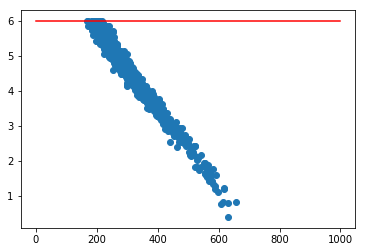

In [10]:
order = A.sum(dim=0).argsort()

plt.scatter(A.sum(dim=0)[order], r[order])
plt.plot(deg.numpy(), ri_pred.numpy(), color='r')
plt.show()

In [11]:
A.sum(dim=0)

tensor([298., 263., 349., 191., 219., 260., 223., 268., 193., 213., 245., 215.,
        453., 330., 286., 196., 196., 309., 337., 270., 192., 333., 355., 219.,
        364., 543., 387., 222., 269., 199., 232., 282., 209., 230., 248., 556.,
        358., 560., 208., 323., 196., 281., 599., 434., 468., 201., 303., 432.,
        293., 234., 519., 253., 432., 202., 199., 199., 421., 220., 253., 222.,
        233., 195., 267., 577., 433., 248., 227., 348., 259., 239., 222., 219.,
        464., 224., 178., 216., 465., 513., 322., 225., 388., 345., 327., 291.,
        226., 284., 266., 531., 193., 240., 320., 320., 206., 416., 276., 554.,
        277., 372., 238., 263., 404., 186., 223., 403., 179., 272., 291., 200.,
        182., 335., 282., 317., 266., 253., 337., 235., 197., 235., 316., 568.,
        194., 442., 244., 214., 282., 231., 191., 244., 189., 511., 290., 421.,
        499., 263., 197., 309., 255., 208., 206., 239., 210., 204., 265., 285.,
        246., 302., 434., 314., 284., 42

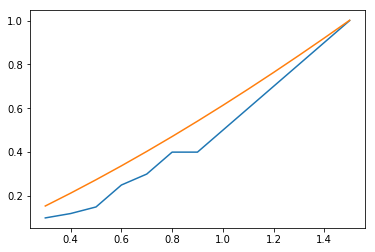

In [12]:
alp = torch.arange(0.3, 1.6, 0.1)
a = torch.tensor([.1, .12, .15, .25, .3, .4, .4, .5, .6, 0.7, 0.8, 0.9, 1.])
f = lambda x: ((x).exp()+1).log()-0.7
plt.plot(alp.numpy(), a.numpy())
plt.plot(alp.numpy(), f(alp).numpy())
plt.show()

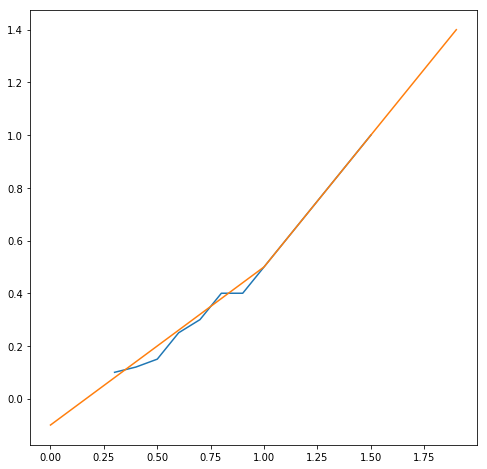

In [13]:
x = torch.arange(0., 2.,.1)
f = lambda x: torch.max(x-0.5, x*0.6-0.1)
plt.figure(figsize=(8,8))
plt.plot(alp.numpy(), a.numpy())
#plt.plot(x.numpy(), x.numpy()-0.5)
#plt.plot(x.numpy(), x.numpy()*.6-0.1)
plt.plot(x.numpy(), f(x).numpy())
plt.show()

In [14]:
r_init = noise_r(r, R, rel_var=0.05)
phi_init = noise_phi(theta, 0.05)

r_loc_init = logit(r_init/R)*R/5
r_scale_init = torch.ones([N]).double().log()
phi_loc_init = polar2cart(1, phi_init)

NameError: name 'noise_r' is not defined

In [ ]:
R_conc_init = torch.tensor(10.).log()
R_scale_init = torch.tensor(1.).log()
alpha_conc_init = torch.tensor(.5).log()
alpha_scale_init = torch.tensor(.5).log()
T_init = torch.tensor([3.,10.]).log()

In [ ]:
dataloader = DataLoader(EdgesDataset(A), batch_size=N, shuffle=True, num_workers=0)
vi = VI_HRG(N,10, init_values={'rs_loc':r_loc_init,
                                'rs_scale':r_scale_init,
                              'phis_loc':phi_loc_init,
                              'phis_scale':None, 
                              'R_conc':R_conc_init, 
                              'R_scale':R_scale_init,
                              'alpha_conc':alpha_conc_init,
                              'alpha_scale':alpha_scale_init,
                              'T':T_init})
vi.dataloader = dataloader
vi.optimizer = torch.optim.RMSprop(vi.parameters())
#vi.optimizer.lr

In [ ]:
with autograd.detect_anomaly():
    vi.train(dataloader, lrs=0.1, debug=False, epochs=30)
    #vi.train(dataloader, lrs=0.01, debug=False, epochs=30)

In [ ]:
rs_, phis_, R_, T_, alpha_ = vi.qmean()
print(R_, T_, alpha_)

### Original

In [ ]:
G.plot()

### Initialized (with noise)

In [ ]:
G_init = HRG(R=R, alpha=alpha, T=T)
G_init.r, G_init.theta, G_init.A = r_init, phi_init, A
G_init.plot()

### Estimated

In [ ]:
G_post = HRG(R=R_, alpha=alpha_, T=T_)
G_post.r, G_post.theta, G_post.A = rs_, c2d(phis_), A
G_post.plot()

In [43]:
np.array([5000]).power(1/3)

AttributeError: 'numpy.ndarray' object has no attribute 'power'

In [41]:
np.sqrt(1000)

31.622776601683793

In [50]:
1000**(1/8), 5000**(1/8)

(2.371373705661655, 2.8998214001102114)